# 7/4 project 진행
---

## 학습에 필요한 data load하기

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv(r'D:\ML_final_project\data\preprocessed_data\preprocessing_train_2nd.csv')
y = pd.read_csv(r'D:\ML_final_project\data\preprocessed_data\preprocessing_test_2nd.csv')

## load한 데이터 확인하기

In [3]:
#9번째 index까지 확인
X.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,1.0,0.0,0,2
1,1,1,1,2.0,3.0,2,2
2,1,3,1,1.0,0.0,0,1
3,1,1,1,2.0,3.0,0,2
4,0,3,0,2.0,0.0,0,1
5,0,3,0,1.0,0.0,1,1
6,0,1,0,3.0,3.0,0,1
7,0,3,0,0.0,2.0,0,5
8,1,3,1,1.0,1.0,0,3
9,1,2,1,0.0,3.0,2,2


In [4]:
#9번째 index까지 확인
y.head(10)

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,0.0,0.0,1,1
1,3,1,0.0,0.0,0,2
2,2,0,0.0,0.0,1,1
3,3,0,0.0,0.0,0,1
4,3,1,0.0,1.0,0,3
5,3,0,0.0,0.0,0,1
6,3,1,0.0,0.0,1,1
7,2,0,0.0,2.0,0,3
8,3,1,0.0,0.0,2,1
9,3,0,0.0,2.0,0,3


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import to_categorical
from keras.callbacks.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [7]:
def plot_learning_curve(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, '-', label='Training acc')
    plt.plot(epochs, val_acc, '-', label='Validation acc')
    plt.legend()

    plt.subplot(122)
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, '-', label='Validation loss')
    plt.legend()

    plt.show()

## dataset 나누기

Survived column은 label로 사용하고 이외의 column들은 input data로 사용하겠다.  
생각해보니 이전 project들을 진행하면서 train과 test data를 X, y라고 표현했는데, X와 y는 지금 사용할 train data의 input과 label로 사용하는 것이 조금 더 정확한 것 같다. 이전에는 그냥 train과 test라고 변수명을 설정하는 것이 더 가독성이 좋았을 것 같다.

In [8]:
train = X
test = y

### dataset 구성하기

In [9]:
X = train.drop('Survived', axis=1).values
y = train['Survived'].values

In [10]:
y_one_hot = to_categorical(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### 실제 test set 구성하기

In [12]:
X_real_test = test.values

### dataset 확인하기

In [13]:
print('Training set shape :   ', 'X', X_train.shape, '|', 'y', y_train.shape)
print('Validation set shape : ', 'X', X_val.shape, ' |', 'y', y_val.shape)
print('Test set shape :       ', 'X', X_test.shape, ' |', 'y', y_test.shape)

Training set shape :    X (720, 6) | y (720, 2)
Validation set shape :  X (81, 6)  | y (81, 2)
Test set shape :        X (90, 6)  | y (90, 2)


### Model 구성하기

model은 각 feature들의 연관성을 찾고자 FCN으로 구성해보았다.  
Dense layer의 activation function은 relu로 설정했고, 마지막층인 output layer의 activation은 이 과제가 생존여부(0, 1)을 classification 하는 것이기 때문에 sigmoid로 설정했다.  
optimizer는 adam, loss function은 이진분류에 좋은 성능을 보이는 binary_crossentropy로 설정했다.

In [14]:
def FCN(input_size = (6,)): #인풋 사이즈 설정
    inputs = Input(input_size)
    
    dense1 = Dense(10, activation='relu')(inputs)
    dense2 = Dense(5, activation='relu')(dense1)
    dense3 = Dense(3, activation='relu')(dense2)
    
    outputs = Dense(2, activation='sigmoid')(dense3)
    
    model = Model(input = inputs, output = outputs)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model

In [16]:
FCN_model = FCN()
FCN_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 8         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


### Model hyperparmeter 설정하기

10 epoch 마다 model을 저장한다.  
저장된 모델은 나중에 다시 꺼내서 쓸 수도 있고, model test에도 사용될 것이다.

In [17]:
save_path = 'D:\ML_final_project\model' #model을 저장할 폴더 경로
num_batch = 16
num_epoch = 100
num_period = 10 #model을 저장하는 간격

In [18]:
checkpointer = ModelCheckpoint(save_path + '/' + 'm0704_' + '{epoch:04d}.hdf5',
                               monitor='val_loss',
                               period=num_period)

#### 아래 셀은 이번 project에는 사용하지 않겠다.

In [19]:
# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=10,
#                                mode='min')

### Model training 하기

In [20]:
FCN_histories = list()

FCN_history = FCN_model.fit(X_train, y_train,
                            validation_data=(X_val,y_val),
                            batch_size=num_batch,
                            epochs=num_epoch,
                            shuffle=True,
                            callbacks=[checkpointer])

FCN_histories.append(FCN_history)


Train on 720 samples, validate on 81 samples
Epoch 1/100
720/720 [==============================] - 0s 249us/step - loss: 0.6821 - acc: 0.6208 - val_loss: 0.6777 - val_acc: 0.5926
Epoch 2/100
720/720 [==============================] - 0s 44us/step - loss: 0.6609 - acc: 0.6208 - val_loss: 0.6670 - val_acc: 0.5926
Epoch 3/100
720/720 [==============================] - 0s 43us/step - loss: 0.6450 - acc: 0.6208 - val_loss: 0.6571 - val_acc: 0.5926
Epoch 4/100
720/720 [==============================] - 0s 43us/step - loss: 0.6299 - acc: 0.6208 - val_loss: 0.6478 - val_acc: 0.5926
Epoch 5/100
720/720 [==============================] - 0s 44us/step - loss: 0.6149 - acc: 0.6208 - val_loss: 0.6351 - val_acc: 0.5926
Epoch 6/100
720/720 [==============================] - 0s 44us/step - loss: 0.5974 - acc: 0.6250 - val_loss: 0.6253 - val_acc: 0.5926
Epoch 7/100
720/720 [==============================] - 0s 44us/step - loss: 0.5801 - acc: 0.6431 - val_loss: 0.6137 - val_acc: 0.6235
Epoch 8/100
720

Epoch 60/100
720/720 [==============================] - 0s 46us/step - loss: 0.4591 - acc: 0.8076 - val_loss: 0.4756 - val_acc: 0.7901
Epoch 61/100
720/720 [==============================] - 0s 46us/step - loss: 0.4586 - acc: 0.8069 - val_loss: 0.4768 - val_acc: 0.7593
Epoch 62/100
720/720 [==============================] - 0s 44us/step - loss: 0.4591 - acc: 0.8090 - val_loss: 0.4726 - val_acc: 0.8086
Epoch 63/100
720/720 [==============================] - 0s 46us/step - loss: 0.4581 - acc: 0.8035 - val_loss: 0.4729 - val_acc: 0.8086
Epoch 64/100
720/720 [==============================] - 0s 46us/step - loss: 0.4572 - acc: 0.8062 - val_loss: 0.4768 - val_acc: 0.7593
Epoch 65/100
720/720 [==============================] - 0s 46us/step - loss: 0.4561 - acc: 0.8090 - val_loss: 0.4729 - val_acc: 0.8148
Epoch 66/100
720/720 [==============================] - 0s 47us/step - loss: 0.4558 - acc: 0.8076 - val_loss: 0.4841 - val_acc: 0.7840
Epoch 67/100
720/720 [==============================] -

### Learning graph 나타내기

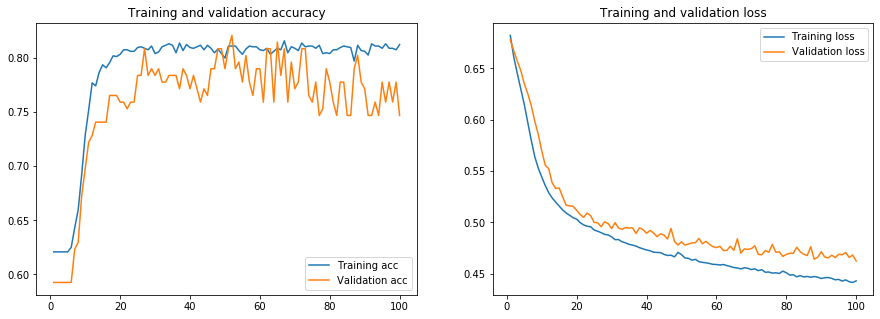

In [21]:
for idx, history in enumerate(FCN_histories):
    plot_learning_curve(history)

### Model test 하기

In [44]:
model_path = r'D:\ML_final_project\model\m0704\m0704_0100.hdf5'
model = load_model(model_path)

In [45]:
y_label = np.argmax(y_test, 1)
y_fit = np.argmax(FCN_model.predict(X_test), 1)
confusion_mat = confusion_matrix(y_label, y_fit)

print('y_true =', y_label)
print('y_pred =', y_fit)
print('-' * 50)
print('<confusion_mat>')
confusion_mat

y_true = [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0]
y_pred = [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0]
--------------------------------------------------
<confusion_mat>


array([[46,  8],
       [ 7, 29]], dtype=int64)

In [46]:
precision, recall, fscore, support = score(y_label, y_fit)

print('accuracy  :', accuracy)
print('recall    :', recall)
print('precision :', precision)
print('fscore    :', fscore)
print('support   :', support)

accuracy  : 0.8333333333333334
recall    : [0.85185185 0.80555556]
precision : [0.86792453 0.78378378]
fscore    : [0.85981308 0.79452055]
support   : [54 36]


---
## training에 사용되지 않은 data로 model inference 하기

kaggle 홈페이지에서 제공한 gender_submission이라는 csv파일을 갖고 model을 inference 해보겠다.

In [47]:
y_real_test = pd.read_csv('D:\ML_final_project\data\gender_submission.csv')

In [48]:
y_real_test.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [50]:
y_real_label_one_hot = to_categorical(y_real_test['Survived'])
y_real_label = np.argmax(y_real_label_one_hot, 1)
y_real_fit = np.argmax(FCN_model.predict(X_real_test), 1)
confusion_mat = confusion_matrix(y_real_label, y_real_fit)

print('y_true =', y_real_label)
print('y_pred =', y_real_fit)
print('-' * 50)
print('<confusion_mat>')
confusion_mat

y_true = [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
y_pred = [0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1

array([[209,  57],
       [  5, 147]], dtype=int64)

In [51]:
precision, recall, fscore, support = score(y_real_label, y_real_fit)

print('accuracy  :', accuracy)
print('recall    :', recall)
print('precision :', precision)
print('fscore    :', fscore)
print('support   :', support)

accuracy  : 0.8333333333333334
recall    : [0.78571429 0.96710526]
precision : [0.97663551 0.72058824]
fscore    : [0.87083333 0.8258427 ]
support   : [266 152]


## Result

training에 사용되지 않은 test.csv와 gender_submission.csv를 통해 model을 inference 한 결과,  
accuracy가 약 0.83이 나온 것을 확인할 수 있었다.